In [20]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import re

def getValue(filename:str, yPara):
    yval = np.array([])
    with open(filename) as d:     #using 'with' keyword will auto-close the file at the end
        for s in d.readlines(): #for the string in whatever line is being read
            if re.search(yPara, s):
                match = re.search(r"\d+\.\d+", s)
                if match:
                    yval = np.append(yval, values= float(match.group()))
                        #print('yval' + str(yval) + '\n'+ '\n')

        #yval = np.average(yval)            
        return yval 
        #print('avg' + str(yavg) + '\n'+ '\n')  

def autodat2(filenames:str, batchints, yParam:str, linename:str, col:str): #x and y are numpy arrays

    x=np.array([])
    y=np.array([])
    y_error = np.array([])
    yParam = str(' ' + yParam + '*')
    count = 0
    for f in filenames: 
        #filedir = f"{data_label}data"
        #filename = f"{data_label}{batch_size}.txt"
        #filepath = f"{filedir}/{filename}"
        
        # define somewhere the function get_value() where you will put readlines, re.search(), etc.
        y_values = getValue(f, yParam) #getvalue only takes one file at a time
        y_mean = np.average(y_values)
        y_err = np.std(y_values)/np.sqrt(len(y_values))

        x = np.append(x, batchints[count])
        y = np.append(y, y_mean)
        y_error = np.append(y_error, y_err)
        count = count + 1

    
    return plt.errorbar(x, y, yerr=y_error, color= col), plt.scatter(x, y, color= col), plt.plot(x, y, label=linename, color= col) 
    

In [9]:
import os
import glob
import re
import numpy as np

def dataFinder(folder:str): 
    """
    Takes: string of the folder that contains data and a list of similarly named files, from current directory
    Returns: [0] - batcharr - sorted array of the batch sizes each file contains as an NParray 
             [1] - batchdir - list of files in the same order as the batch size array
    """

    batcharr=np.array([])
    batchdir=[]
    curdir = os.getcwd()

    for n in glob.glob(str(curdir)+folder):
        batchdir.append(n)
        search = re.search(r"\d+.txt", n) #parse out the 'diff\d+' part of the filename
        search2 = re.search(r'\d+', search.group(0))
        if search:
            intpart = search2.group(0)
            batcharr = np.insert(batcharr, [0], values=intpart)



    batcharr = np.sort(batcharr)
    batchdir.sort(key=lambda f: int(re.sub('\D', '', f))) #stack overflow ily 
    #also ^ that's how lambda  functions in python, idr how to do them in c++ so no comparison here

    return batcharr, batchdir

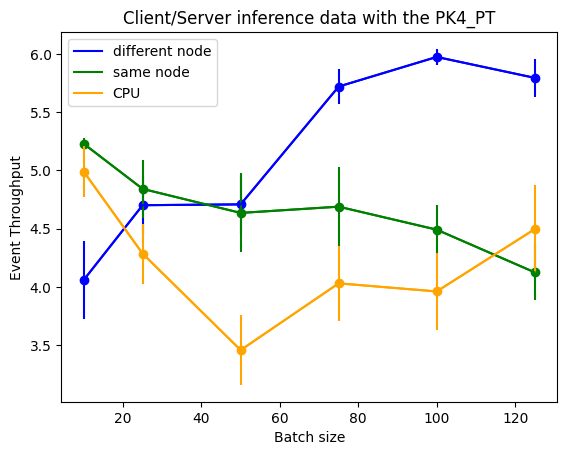

In [21]:

def AxesGiver(xAx:str, yAx:str, title:str):
    return plt.xlabel(xAx), plt.ylabel(yAx), plt.title(title)

diffbatch, diffdir = dataFinder('\\diffdata\\diff*')[0], dataFinder('\\diffdata\\diff*')[1]
samebatch, samedir = dataFinder('\\samedata\\same*')[0], dataFinder('\\samedata\\same*')[1]
CPUbatch, CPUdir = dataFinder('\\CPUdata\\CPU*')[0], dataFinder('\\CPUdata\\CPU*')[1]


autodat2(diffdir, diffbatch, "Event Throughput", "different node", "Blue")
autodat2(samedir, samebatch, "Event Throughput", "same node", "Green")
autodat2(CPUdir, CPUbatch, "Event Throughput", "CPU", "Orange")

AxesGiver("Batch size", "Event Throughput", "Client/Server inference data with the PK4_PT")

plt.legend() 
plt.show() #don't show - instead save it to a file and loop. for loop for what to search for



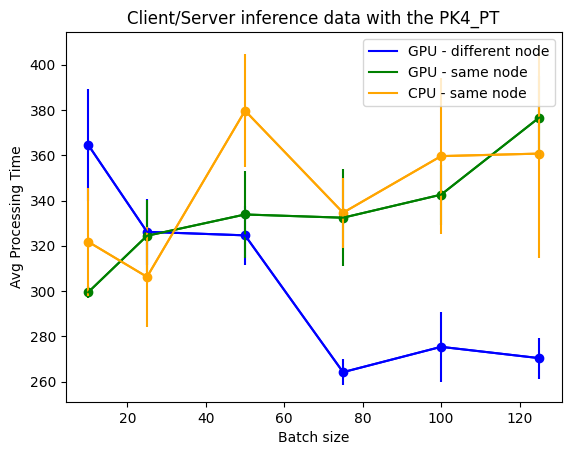

NameError: name 'TimeReport' is not defined

In [19]:

autodat2(diffdir, diffbatch, "Time report", "GPU - different node", "Blue")
autodat2(samedir, samebatch, "Time report", "GPU - same node", "Green")
autodat2(CPUdir, CPUbatch, "Time report", "CPU - same node", "Orange")

AxesGiver("Batch size", "Avg Processing Time", "Client/Server inference data with the PK4_PT")
plt.legend()
plt.show()
plt.savefig(TimeReport.png)